In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from datetime import datetime
import re

In [16]:
df1 = pd.read_csv('Fake.csv',parse_dates =['date'])

In [17]:
df1

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [18]:
df1.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [20]:
##Checking if pattern or regex is contained within df['date'] since an error was observed

df1[df1['date'].str.contains("^https://*")]

,title,text,subject,date
9358,https://100percentfedup.com/served-roy-moore-v...,https://100percentfedup.com/served-roy-moore-v...,politics,https://100percentfedup.com/served-roy-moore-v...
15507,https://100percentfedup.com/video-hillary-aske...,https://100percentfedup.com/video-hillary-aske...,politics,https://100percentfedup.com/video-hillary-aske...
15508,https://100percentfedup.com/12-yr-old-black-co...,https://100percentfedup.com/12-yr-old-black-co...,politics,https://100percentfedup.com/12-yr-old-black-co...
15839,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
15840,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,politics,https://fedup.wpengine.com/wp-content/uploads/...
17432,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
17433,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,Government News,https://fedup.wpengine.com/wp-content/uploads/...
21869,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...
21870,https://fedup.wpengine.com/wp-content/uploads/...,https://fedup.wpengine.com/wp-content/uploads/...,left-news,https://fedup.wpengine.com/wp-content/uploads/...


- The following data will be removed as we can observe only links are present in each column

In [21]:
df1= df1[df1['date'].str.contains("^https://*")==False]

In [22]:
df1[df1['date'].str.contains("^MSNBC*")]

,title,text,subject,date
18933,Homepage,[vc_row][vc_column width= 1/1 ][td_block_trend...,left-news,MSNBC HOST Rudely Assumes Steel Worker Would N...


In [23]:
df1.drop([18933],inplace=True)

In [24]:
df1.reset_index(drop=True)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23466,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23467,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23468,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23469,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [25]:
df1['date'] = df1['date'].astype('datetime64[ns]')


In [26]:
df1['label'] = 1

In [27]:
df1

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,2016-01-16,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,2016-01-16,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,2016-01-15,1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,2016-01-14,1


In [28]:
df2 = pd.read_csv('True.csv',parse_dates =['date'])

In [30]:
df2['label'] = 0

In [32]:
df= df1.append(df2)

In [33]:
df

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0


In [37]:
df['month'] =df['date'].dt.month
df['year'] = df['date'].dt.year
df['dates'] = df['date'].dt.day

In [38]:
df

,title,text,subject,date,label,month,year,dates
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,1,12,2017,31
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,1,12,2017,31
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,1,12,2017,30
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,1,12,2017,29
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,1,12,2017,25
...,...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,2017-08-22,0,8,2017,22
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,2017-08-22,0,8,2017,22
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,2017-08-22,0,8,2017,22
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,2017-08-22,0,8,2017,22


In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =TfidfVectorizer(max_features = 800)
data = tfidf.fit_transform(df.title)
data = pd.DataFrame(data.toarray(), columns = tfidf.get_feature_names_out())

In [88]:
data

,america,american,americans,anti,attack,back,ban,bernie,big,bill,...,war,warns,watch,white,win,woman,world,would,wow,year
0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44883,0.0,0.0,0.0,0.0,0.0,0.77029,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44884,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44885,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
44886,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# DATA CLEANING

In [39]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [40]:
def decontracted(phrase):
    phrase = re.sub(r"’","'",str(phrase))
    phrase = re.sub(r"”",'"',str(phrase))
    phrase = re.sub(r"“",'"',str(phrase))
    phrase = re.sub(r"won't","will not",str(phrase))
    phrase = re.sub(r"can\'t","can not",str(phrase))
    phrase = re.sub(r"n\'t"," not",str(phrase))
    phrase = re.sub(r"\'re"," are",str(phrase))
    phrase = re.sub(r"don't","do not",str(phrase))
    phrase = re.sub(r"\'s","s",str(phrase))
    phrase = re.sub(r"\'ll"," will",str(phrase))
    phrase = re.sub(r"\'d"," would",str(phrase))
    phrase = re.sub(r"\'t"," not",str(phrase))
    phrase = re.sub(r"\'ve"," have",str(phrase))
    phrase = re.sub(r"\'m"," am",str(phrase))
    return str(phrase)


In [42]:
l = WordNetLemmatizer()

In [52]:
stop_words = set(stopwords.words('english')+ ['u','im','ur', 'going','ok','will','said'])

In [45]:
news = []
for sentence in df['text'].values:
    sent = decontracted(sentence)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','',sent)
    sent = re.sub('[^A-Za-z]', ' ',sent)
    sent = sent.split()
    
    sent = [l.lemmatize(word) for word in sent if word.lower() not in stop_words]
    sent =' '.join(sent)
    news.append(sent.lower().strip())

In [46]:
df['text'] =news

In [47]:
df

,title,text,subject,date,label,month,year,dates
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,2017-12-31,1,12,2017,31
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,2017-12-31,1,12,2017,31
2,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,2017-12-30,1,12,2017,30
3,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,2017-12-29,1,12,2017,29
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,2017-12-25,1,12,2017,25
...,...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato ally tuesday welcomed pr...,worldnews,2017-08-22,0,8,2017,22
21413,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,2017-08-22,0,8,2017,22
21414,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused soviet era factor...,worldnews,2017-08-22,0,8,2017,22
21415,Vatican upbeat on possibility of Pope Francis ...,moscow reuters vatican secretary state cardina...,worldnews,2017-08-22,0,8,2017,22


# DATA VIZUALIZATION

<AxesSubplot:xlabel='label', ylabel='count'>

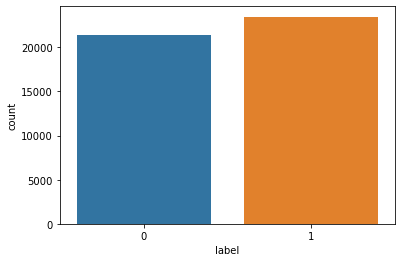

In [154]:
sns.countplot(df['label'])

In [48]:
from wordcloud import WordCloud
wc = WordCloud(background_color = 'white',collocations=False, colormap = 'Dark2', max_font_size = 150, random_state =42, max_words= 30)

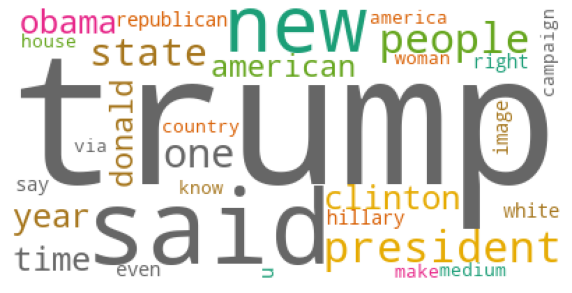

In [50]:
fake_cloud = wc.generate(' '.join(df['text'][df['label']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(fake_cloud)
plt.axis('off')
plt.show()

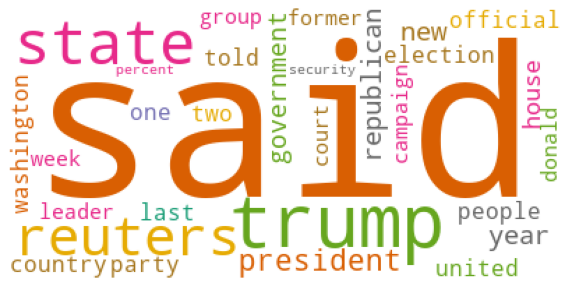

In [155]:
true_cloud = wc.generate(' '.join(df['text'][df['label']==0]))
    
plt.figure(figsize =(10,6))
plt.imshow(true_cloud)
plt.axis('off')
plt.show()

- We can not really distinguis between fake news and real news using word cloud from text data

In [56]:
news_t = []
for sentence in df['title'].values:
    sent = decontracted(sentence)
    sent = re.sub(r'https?:\/\/.*[\r\n]*','',sent)
    sent = re.sub('[^A-Za-z]', ' ',sent)
    sent = sent.split()
    
    sent = [l.lemmatize(word) for word in sent if word.lower() not in stop_words]
    sent =' '.join(sent)
    news_t.append(sent.lower().strip())

In [57]:
news_t

['donald trump sends embarrassing new years eve message disturbing',
 'drunk bragging trump staffer started russian collusion investigation',
 'sheriff david clarke becomes internet joke threatening poke people eye',
 'trump obsessed even obamas name coded website images',
 'pope francis called donald trump christmas speech',
 'racist alabama cops brutalize black boy handcuffs graphic images',
 'fresh golf course trump lashes fbi deputy director james comey',
 'trump insanely racist stuff inside oval office witnesses back',
 'former cia director slams trump un bullying openly suggests hes acting like dictator tweet',
 'watch brand new pro trump ad features much kissing make sick',
 'papa johns founder retires figures racism bad business',
 'watch paul ryan told us care struggling families living blue states',
 'bad news trump mitch mcconnell says repealing obamacare',
 'watch lindsey graham trashes media portraying trump kooky forgets words',
 'heiress disney empire knows gop scammed u

In [58]:
df['title'] = news_t

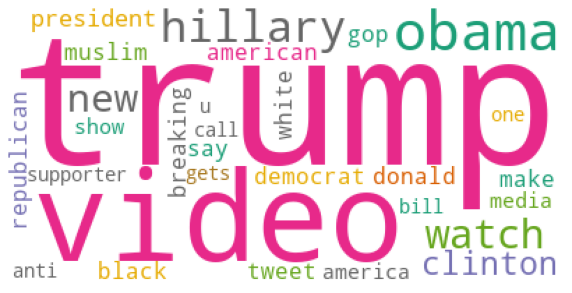

In [59]:
fake_cloud = wc.generate(' '.join(df['title'][df['label']==1]))
    
plt.figure(figsize =(10,6))
plt.imshow(fake_cloud)
plt.axis('off')
plt.show()

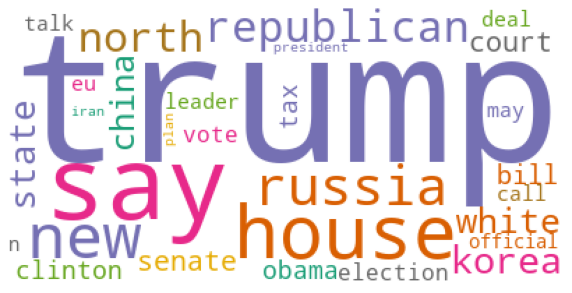

In [60]:
true_cloud = wc.generate(' '.join(df['title'][df['label']==0]))
    
plt.figure(figsize =(10,6))
plt.imshow(true_cloud)
plt.axis('off')
plt.show()

- We can not really distinguis between fake news and real news using word cloud from title data

<Figure size 648x360 with 0 Axes>

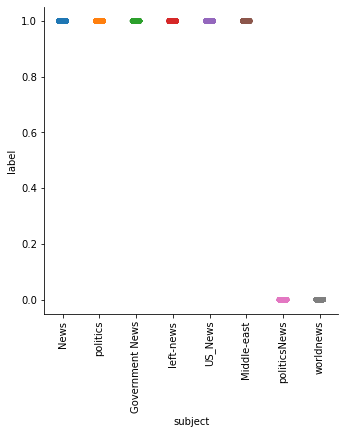

In [66]:
plt.figure(figsize=(9,5))
sns.catplot(data=df, x="subject", y='label')
plt.xticks(rotation=90)
plt.show()

- All the fake news were under the subject politicsNews and world news

In [62]:
df['subject'].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6836
left-news           4456
Government News     1568
US_News              783
Middle-east          778
Name: subject, dtype: int64

# Model Building

In [92]:
X = data
y= df['label']

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

In [93]:
MaxR2 = 0
MaxRS =0
for i in range(1,50):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,stratify=y, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train,y_train)
    predr= rf.predict(X_test)
    acc= accuracy_score(y_test,predr)
    print('accuracy',acc,'random_state',1)
    
    if acc>MaxR2:
        MaxR2=acc
        MaxRS= i
print('Best accuracy score is', MaxR2,'at random state', MaxRS)

accuracy 0.933949654711517 random_state 1
accuracy 0.9314992203163288 random_state 1
accuracy 0.9281577188683449 random_state 1
accuracy 0.9293829360659389 random_state 1
accuracy 0.9287146357763422 random_state 1
accuracy 0.9294943194475385 random_state 1
accuracy 0.931053686789931 random_state 1
accuracy 0.9312764535531298 random_state 1
accuracy 0.9281577188683449 random_state 1
accuracy 0.9302740031187346 random_state 1
accuracy 0.9326130541323234 random_state 1
accuracy 0.9326130541323234 random_state 1
accuracy 0.9319447538427267 random_state 1
accuracy 0.9320561372243261 random_state 1
accuracy 0.9311650701715304 random_state 1
accuracy 0.9321675206059256 random_state 1
accuracy 0.9349521051459122 random_state 1
accuracy 0.9304967698819336 random_state 1
accuracy 0.9349521051459122 random_state 1
accuracy 0.9284918690131433 random_state 1
accuracy 0.9348407217643128 random_state 1
accuracy 0.9320561372243261 random_state 1
accuracy 0.9307195366451325 random_state 1
accuracy 0.93

In [94]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,stratify=y, random_state=29)

In [96]:
ada= AdaBoostClassifier()
ada.fit(X_train,y_train)
adapred = ada.predict(X_test)
print('Score', accuracy_score(y_test,adapred))
print(confusion_matrix(y_test,adapred))
print(classification_report(y_test,adapred))

cv = cross_val_score(ada,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,adapred)- abs(cv.mean()))
print('**'*50)


Score 0.8426152817999555
[[4132  152]
 [1261 3433]]
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      4284
           1       0.96      0.73      0.83      4694

    accuracy                           0.84      8978
   macro avg       0.86      0.85      0.84      8978
weighted avg       0.87      0.84      0.84      8978

Cross Validation Score: 
 0.8124215154175646
Difference in cross val score
 0.030193766382390907
****************************************************************************************************


In [97]:
naive= MultinomialNB()
naive.fit(X_train,y_train)
naivepred = naive.predict(X_test)
print('Score', accuracy_score(y_test,naivepred))
print(confusion_matrix(y_test,naivepred))
print(classification_report(y_test,naivepred))

cv = cross_val_score(naive,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,naivepred)- abs(cv.mean()))
print('**'*50)


Score 0.9167966139451994
[[3862  422]
 [ 325 4369]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4284
           1       0.91      0.93      0.92      4694

    accuracy                           0.92      8978
   macro avg       0.92      0.92      0.92      8978
weighted avg       0.92      0.92      0.92      8978

Cross Validation Score: 
 0.9017555043443488
Difference in cross val score
 0.015041109600850588
****************************************************************************************************


In [99]:
nb= GaussianNB()
nb.fit(X_train,y_train)
nbpred = nb.predict(X_test)
print('Score', accuracy_score(y_test,nbpred))
print(confusion_matrix(y_test,nbpred))
print(classification_report(y_test,nbpred))

cv = cross_val_score(nb,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,nbpred)- abs(cv.mean()))
print('**'*50)

Score 0.8800400980173758
[[4153  131]
 [ 946 3748]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4284
           1       0.97      0.80      0.87      4694

    accuracy                           0.88      8978
   macro avg       0.89      0.88      0.88      8978
weighted avg       0.89      0.88      0.88      8978

Cross Validation Score: 
 0.8673135638750933
Difference in cross val score
 0.01272653414228253
****************************************************************************************************


In [101]:
rf= RandomForestClassifier()
rf.fit(X_train,y_train)
rfpred = rf.predict(X_test)
print('Score', accuracy_score(y_test,rfpred))
print(confusion_matrix(y_test,rfpred))
print(classification_report(y_test,rfpred))

cv = cross_val_score(rf,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,rfpred)- abs(cv.mean()))
print('**'*50)

Score 0.9376253063042994
[[4008  276]
 [ 284 4410]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4284
           1       0.94      0.94      0.94      4694

    accuracy                           0.94      8978
   macro avg       0.94      0.94      0.94      8978
weighted avg       0.94      0.94      0.94      8978

Cross Validation Score: 
 0.9053637203478975
Difference in cross val score
 0.03226158595640194
****************************************************************************************************


In [102]:
gb= GradientBoostingClassifier()
gb.fit(X_train,y_train)
gbpred = gb.predict(X_test)
print('Score', accuracy_score(y_test,gbpred))
print(confusion_matrix(y_test,gbpred))
print(classification_report(y_test,gbpred))

cv = cross_val_score(gb,X,y,cv=10)
print('Cross Validation Score: \n', cv.mean())
print('Difference in cross val score\n', accuracy_score(y_test,gbpred)- abs(cv.mean()))
print('**'*50)

Score 0.8412786812207619
[[4150  134]
 [1291 3403]]
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      4284
           1       0.96      0.72      0.83      4694

    accuracy                           0.84      8978
   macro avg       0.86      0.85      0.84      8978
weighted avg       0.87      0.84      0.84      8978

Cross Validation Score: 
 0.8195044213841797
Difference in cross val score
 0.02177425983658221
****************************************************************************************************


Conclusion:
To select the best model, based on this problem, I considered the model that will predict more fake news, and also have lower count of False positves. While the former reason is self explanatory, the latter is because more the "fake news" are predicted as True, the worse is our model. Hence, apart from accuracy as our metric, I will also be considering precision and recall as factors for evaluating my models.

- Comparitively RandomForestClssifier is performing well in all aspects, with accuracy of 93%
- Pecision for fake news being 94% and for true news to be 93%. Recall was  found to be 94% for both labels.
- However, if I give more weigtage tohaving fewer fake news presented as positive news i.e fewer False positives then GaussianNB performs the best as it has a precision of 97% for Fake new. It has a lower accuracy of 88%. And has the drawback of predicting more True news as Fake News. 

# HYPERPARAMETER TUNING

In [106]:
from sklearn.model_selection import RandomizedSearchCV

In [141]:
#n_estimators for number of random forest
#max_features for features considered in every split
#max_depth for number of levels alloved in each tree
#min_sample split for minimum samples to split a node

parameters ={ "n_estimators": [1,2,3,4,5,6,7,8,9],
"max_features": ["auto","sqrt"],
"max_depth":[int(x) for x in np.linspace(10,250,num=12)], "min_samples_split":[11,12,13,14,15,16,17,18,19], "min_samples_leaf":[1,3,4]}

In [142]:
RCV= RandomizedSearchCV(RandomForestClassifier(random_state = 29),param_distributions=parameters,scoring='neg_mean_squared_error',cv=5)

In [143]:
RCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=29),
                   param_distributions={'max_depth': [10, 31, 53, 75, 97, 119,
                                                      140, 162, 184, 206, 228,
                                                      250],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9]},
                   scoring='neg_mean_squared_error')

In [144]:
RCV.best_params_

{'n_estimators': 6,
 'min_samples_split': 13,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 162}

In [145]:
RCV_pred = RCV.best_estimator_.predict(X_test)

In [146]:
accuracy_score(y_test,RCV_pred)

0.9166852305636

- Since after hyperparameter tuning the values did not improve, the parameters must be the best

# ROC- AUC CURVE

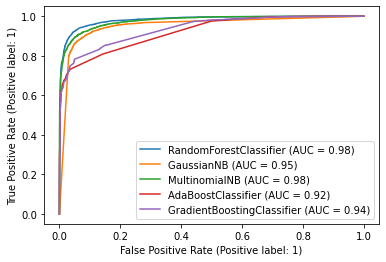

In [151]:
classifiers = [rf, nb, naive, ada, gb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

- Finally the ROC-AUC Curve also points towards RandomForestClassifier which has an AUC score of 0.98, indicates it as the best model

# Saving best model

In [152]:
import joblib

In [153]:
joblib.dump(rf,'FakeNewsProject')

['FakeNewsProject']